### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

### The output file should be named 
         
          eu_future.sqlite

In [3]:
# dictionary to hold data for plotting:
astrid_fuel_from_uox = {}
uox_reprocessed = {}
avg_reprocess_capacity = {}
max_reprocess_capacity = {}
uox_avg_reprocess_capacity = {}
uox_max_reprocess_capacity = {}

In [5]:
! cyclus 108br.xml -o 108br.sqlite
! cyclus 111br.xml -o 111br.sqlite
! cyclus 115br.xml -o 115br.sqlite
! cyclus 118br.xml -o 118br.sqlite
! cyclus 5yr_108.xml -o 5yr_108.sqlite
! cyclus 10yr_108.xml -o 10yr_108.sqlite
! cyclus 20yr_108.xml -o 20yr_108.sqlite

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Further Experimental Warnings will be suppressed.

Status: Cyclus run successful!
Output location: 5yr_108.sqlite
Simulation ID: 5334a3d7-a1b5-40f0-919a-4e0af5cb0eb7
              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

In [6]:
# get sqlite cursor and simulation time data
cur_108br = an.get_cursor('108br.sqlite')
cur_111br = an.get_cursor('111br.sqlite')
cur_115br = an.get_cursor('115br.sqlite')
cur_118br = an.get_cursor('118br.sqlite')
cur_5ext_108br = an.get_cursor('5yr_108.sqlite')
cur_5ext_111br = an.get_cursor('5yr_111.sqlite')
cur_5ext_115br = an.get_cursor('5yr_115.sqlite')
cur_10ext_108br = an.get_cursor('10yr_108.sqlite')
cur_20ext_108br = an.get_cursor('20yr_108.sqlite')

cursor_list = [cur_108br, cur_111br, cur_115br, cur_118br, cur_5ext_108br, cur_5ext_111br, cur_5ext_115br, cur_10ext_108br, cur_20ext_108br]
init_year, init_month, duration, timestep = an.get_timesteps(cur_111br)

In [7]:
# Pu Composition in Spent Fuels:
pu_frac_spent_uox = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
obr = cur_108br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
fivebr = cur_115br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.15" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
onebr = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.11" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
eightbr = cur_118br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.18" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
print('Pu composition of spent fuel:')
print('BR 1.08:')
print(obr[0])
print('BR 1.11:')
print(onebr[0])
print('BR 1.15:')
print(fivebr[0])
print('BR 1.18:')
print(eightbr[0])

Pu composition of spent fuel:
BR 1.08:
0.27431405161777184
BR 1.11:
0.2927282490909536
BR 1.15:
0.3012337276327513
BR 1.18:
0.310254559737049


In [9]:
import numpy as np

file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite',
             '5yr_108.sqlite', '10yr_108.sqlite', '20yr_108.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = obr[0]
    if '111' in file:
        used_comp = onebr[0]
    if '115' in file:
        used_comp = fivebr[0]
    if '118' in file:
        used_comp = eightbr[0]
    
    
    print(file)
    cursor = an.get_cursor(file)
    time_sum = cursor.execute('SELECT time, sum(quantity) from transactions' 
                              ' INNER JOIN resources ON resources.resourceid = transactions.resourceid'
                              ' WHERE commodity = "astrid_fuel_legacy" GROUP BY time').fetchall()
    list =[]
    
    agent_ids = an.get_prototype_id(cursor, 'astrid_mixer_uox')
    fuel_from_uox_timeseries = an.facility_commodity_flux(cursor, agent_ids, ['astrid_fuel_legacy'], True, False)
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_from_uox_timeseries['astrid_fuel_legacy']]
    fuel_from_uox = sum(fuel_from_uox_timeseries['astrid_fuel_legacy'])
    
    agent_ids = an.get_prototype_id(cursor, 'astrid_mixer_astrid')
    fuel_from_astrid_timeseries = an.facility_commodity_flux(cursor, agent_ids, ['astrid_fuel_new'], True, False)
    rep_for_astrid = [x *0.22 / used_comp for x in fuel_from_astrid_timeseries['astrid_fuel_new']]
    fuel_supply = 0
    
    total_rep = np.array([x+y for x,y in zip(rep_for_uox, rep_for_astrid)])
    average_rep = total_rep[total_rep.nonzero()].mean()
    print(average_rep)
    
    
    for row in time_sum:
        list.append(row['time'])
        fuel_supply = fuel_supply + row['sum(quantity)']
    print('Last Year')
    print(2040 + (max(list)-840)/12)
    month_of_supply = max(list) - 600
    average_fuel_supply = fuel_supply / month_of_supply
    average_rep = average_fuel_supply * 0.22 / pu_frac_spent_uox[0]
    print('Average Fuel Supply from Reprocessed UOX')
    print(average_fuel_supply/1000)
    print('Average UOX Reprocessing Capacity')
    print(average_rep/1000)
    print('Fuel from Reprocessed UOX UNF:')
    print(fuel_from_uox)
    print('Total UOX UNF Reprocessed:')
    print(fuel_from_uox * 0.22 / (pu_frac_spent_uox[0]))
    print('\n \n')
    

108br.sqlite
73.2732949229
Last Year
2057.9166666666665
Average Fuel Supply from Reprocessed UOX
6.424615384615385
Average UOX Reprocessing Capacity
118.92530881836133
Fuel from Reprocessed UOX UNF:
2923.2
Total UOX UNF Reprocessed:
54111.0155124

 

111br.sqlite
72.2105789984
Last Year
2054.4166666666665
Average Fuel Supply from Reprocessed UOX
6.727438256658595
Average UOX Reprocessing Capacity
124.53082781351249
Fuel from Reprocessed UOX UNF:
2778.432
Total UOX UNF Reprocessed:
51431.231887

 

115br.sqlite
70.1926086506
Last Year
2053.3333333333335
Average Fuel Supply from Reprocessed UOX
6.73728
Average UOX Reprocessing Capacity
124.71300718085489
Fuel from Reprocessed UOX UNF:
2694.912
Total UOX UNF Reprocessed:
49885.2028723

 

118br.sqlite
68.7870336833
Last Year
2052.8333333333335
Average Fuel Supply from Reprocessed UOX
6.6985583756345175
Average UOX Reprocessing Capacity
123.99623569183458
Fuel from Reprocessed UOX UNF:
2639.232
Total UOX UNF Reprocessed:
48854.5168626

 



In [10]:
import matplotlib.pyplot as plt

br = [1.08, 1.11, 1.15, 1.18]

br_rep_qn = [54111, 51431, 49885, 48854]
br_avg_uox_rep = [118, 124.53, 124.71, 123.996]
br_all_rep_qn = [73.27, 72.21, 70.19, 68.78]

# double axis plot (Breeding Ratio and )
fig, ax1 = plt.subplots()
ax1.set_xlabel('Breeding Ratio')
ax1.tick_params('y', colors='b')
ax1.set_ylabel('Monthly Average UOX Reprocessing [MTHM/Month]', color='b')
pt1 = ax1.plot(br, br_avg_uox_rep, 'bs', label='Monthly Avg. Reprocessing')

ax2 = ax1.twinx()
ax2.tick_params('y', colors='g')
ax2.set_ylabel('Monthly Average Total Reprocessing [MTHM]', color='g')
pt2 = ax2.plot(br, br_all_rep_qn, 'g^', label='Tot Monthly Reprocessing')

plt.tight_layout()
plt.title('Breeding Ratio vs Average Monthly Reprocessing Capacity')
plt.savefig('br.png', format='png')
plt.close()

plt.plot(br, br_rep_qn, 'bs', label='Total UOX UNF Reprocessed')
plt.title('Breeding Ratio vs Total UOX UNF Reprocessed')
plt.savefig('br_uox.png', format='png')
plt.close()

ext = [0, 5, 10, 20]
ext_avg_uox_rep = [118.92, 122.54, 111.29, 88.96]
ext_rep_qn = [54111, 55760, 55760, 55244]
ext_all_rep_qn = [73.27, 85.3, 85.94, 84.79]
plt.plot(ext, ext_avg_uox_rep, 'bs')
plt.title('Lifetime Extension vs Average UOX Monthly Reprocessing')
plt.xlabel('Lifetime Extension [Years]')
plt.ylabel('Monthly Average Reprocessing [MTHM/month]')
plt.savefig('ext_uox.png', format='png')
plt.close()

plt.plot(ext, ext_all_rep_qn, 'bs')
plt.title('Lifetime Extension vs Average Total Monthly Reprocessing')
plt.xlabel('Lifetime Extension [Years]')
plt.ylabel('Monthly Average Reprocessing [MTHM/month]')
plt.savefig('ext_all.png', format='png')
plt.close()

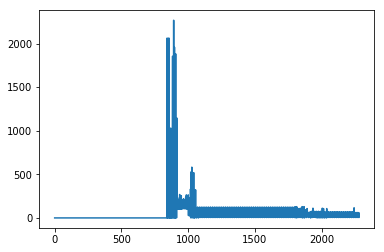

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
2923.2
Total ASTRID fuel from spent ASTRID fuel:
60529.728
Total Legacy UNF Reprocessed:
54111.0155124
Average Fuel flux:
0.0
Average reprocessing Capacity per month
0.0
Maximum reprocessing Capcity reqd
2267.50922147


In [25]:
# 1.08 br case:
agent_ids = an.get_prototype_id(cur_108br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_108br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_108br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']

monthly_rep_dict = {}
uox_rep_monthly = [ x * .22 / pu_frac_spent_uox[0] for x in dict['fuel from spent uox']]
astrid_rep_monthly = [y * .22 / obr[0] for y in dict['fuel from spent astrid_fuel']]
tot_rep_monthly = [x + y for x,y in zip(uox_rep_monthly, astrid_rep_monthly)]
plt.plot(timestep, tot_rep_monthly)
plt.show()

an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])

astrid_fuel_from_uox['1.08'] = sum(dict['fuel from spent uox'])
uox_reprocessed['1.08'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]

# get pu flux and reprocessing capacity
agent_ids = an.get_prototype_id(cur_108br, 'astrid_mixer_uox')
flux = an.facility_commodity_flux(cur_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
fuelflux = flux['astrid_fuel_legacy']
total_fuel = 0
months = 0
for i in range(0, len(fuelflux)):
    if fuelflux[i] != 0:
        lastmonth = i
        months += 1


uox_avg_reprocess_capacity['1.08'] = (total_fuel * 0.22) / months / pu_frac_spent_uox[0]
uox_max_reprocess_capacity['1.08'] = (max(fuelflux) * 0.22) / pu_frac_spent_uox[0]

print('Average Fuel flux:')
print(total_fuel / months)
print('Average reprocessing Capacity per month')
print(uox_avg_reprocess_capacity['1.08'])
print('Maximum reprocessing Capcity reqd')
print(uox_max_reprocess_capacity['1.08'])


In [13]:
# 1.11 br case:
agent_ids = an.get_prototype_id(cur_111br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_111br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_111br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_111br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])


astrid_fuel_from_uox['1.11'] = sum(dict['fuel from spent uox'])
uox_reprocessed['1.11'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]


astrid_fuel_from_uox['1.11'] = sum(dict['fuel from spent uox'])
uox_reprocessed['1.11'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]

# get pu flux and reprocessing capacity
agent_ids = an.get_prototype_id(cur_111br, 'astrid_mixer_uox')
flux = an.facility_commodity_flux(cur_111br, agent_ids, ['astrid_fuel_legacy'], True, False)
fuelflux = flux['astrid_fuel_legacy']
total_fuel = 0
months = 0

for i in range(0, len(fuelflux)):
    if fuelflux[i] != 0:
        total_fuel += fuelflux[i]
        months += 1


uox_avg_reprocess_capacity['1.11'] = (total_fuel * 0.22) / months / pu_frac_spent_uox[0]
uox_max_reprocess_capacity['1.11'] = (max(fuelflux) * 0.22) / pu_frac_spent_uox[0]

print('Average Fuel flux:')
print(total_fuel / months)
print('Average reprocessing Capacity per month')
print(uox_avg_reprocess_capacity['1.11'])
print('Maximum reprocessing Capcity reqd')
print(uox_max_reprocess_capacity['1.11'])

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
2778.432
Total ASTRID fuel from spent ASTRID fuel:
60796.992
Total Legacy UNF Reprocessed:
51431.231887
Average Fuel flux:
21.5382325581
Average reprocessing Capacity per month
398.691720054
Maximum reprocessing Capcity reqd
2267.50922147


In [14]:
# 1.15 br case
agent_ids = an.get_prototype_id(cur_115br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_115br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_115br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_115br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])



astrid_fuel_from_uox['1.15'] = sum(dict['fuel from spent uox'])
uox_reprocessed['1.15'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]


/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
2694.912
Total ASTRID fuel from spent ASTRID fuel:
60964.032
Total Legacy UNF Reprocessed:
49885.2028723


In [15]:
# 1.18 br case
agent_ids = an.get_prototype_id(cur_118br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_118br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_118br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_118br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])



astrid_fuel_from_uox['1.18'] = sum(dict['fuel from spent uox'])
uox_reprocessed['1.18'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]


/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
2639.232
Total ASTRID fuel from spent ASTRID fuel:
61092.096
Total Legacy UNF Reprocessed:
48854.5168626


In [16]:
# 5 yr ext case
agent_ids = an.get_prototype_id(cur_5ext_108br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_5ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_5ext_108br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_5ext_108br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])


astrid_fuel_from_uox['5ext_1.08'] = sum(dict['fuel from spent uox'])
uox_reprocessed['5ext_1.08'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]



# get pu flux and reprocessing capacity
agent_ids = an.get_prototype_id(cur_5ext_108br, 'astrid_mixer_uox')
flux = an.facility_commodity_flux(cur_5ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
fuelflux = flux['astrid_fuel_legacy']
total_fuel = 0
months = 0

for i in range(0, len(fuelflux)):
    if fuelflux[i] != 0:
        total_fuel += fuelflux[i]
        months += 1


uox_avg_reprocess_capacity['5ext_1.08'] = (total_fuel * 0.22) / months / pu_frac_spent_uox[0]
uox_max_reprocess_capacity['5ext_1.08'] = (max(fuelflux) * 0.22) / pu_frac_spent_uox[0]

print('Average Fuel flux:')
print(total_fuel / months)
print('Average reprocessing Capacity per month')
print(uox_avg_reprocess_capacity['5ext_1.08'])
print('Maximum reprocessing Capcity reqd')
print(uox_max_reprocess_capacity['5ext_1.08'])

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
3012.288
Total ASTRID fuel from spent ASTRID fuel:
41047.296
Total Legacy UNF Reprocessed:
55760.113128
Average Fuel flux:
30.4271515152
Average reprocessing Capacity per month
563.233465939
Maximum reprocessing Capcity reqd
2576.7150244


In [17]:
# 10 yr  1.08 br case:
agent_ids = an.get_prototype_id(cur_10ext_108br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_10ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_10ext_108br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_10ext_108br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])

astrid_fuel_from_uox['10ext_1.08'] = sum(dict['fuel from spent uox'])
uox_reprocessed['10ext_1.08'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]



# get pu flux and reprocessing capacity
agent_ids = an.get_prototype_id(cur_10ext_108br, 'astrid_mixer_uox')
flux = an.facility_commodity_flux(cur_10ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
fuelflux = flux['astrid_fuel_legacy']
total_fuel = 0
months = 0

for i in range(0, len(fuelflux)):
    if fuelflux[i] != 0:
        total_fuel += fuelflux[i]
        months += 1


uox_avg_reprocess_capacity['10ext_1.08'] = (total_fuel * 0.22) / months / pu_frac_spent_uox[0]
uox_max_reprocess_capacity['10ext_1.08'] = (max(fuelflux) * 0.22) / pu_frac_spent_uox[0]

print('Average Fuel flux:')
print(total_fuel / months)
print('Average reprocessing Capacity per month')
print(uox_avg_reprocess_capacity['10ext_1.08'])
print('Maximum reprocessing Capcity reqd')
print(uox_max_reprocess_capacity['10ext_1.08'])

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
3012.288
Total ASTRID fuel from spent ASTRID fuel:
39883.584
Total Legacy UNF Reprocessed:
55760.113128
Average Fuel flux:
34.624
Average reprocessing Capacity per month
640.920840551
Maximum reprocessing Capcity reqd
2679.78362537


In [18]:
# 20 yr  1.08 br case:
agent_ids = an.get_prototype_id(cur_20ext_108br, 'astrid_mixer_uox')
fuel_from_uox = an.facility_commodity_flux(cur_20ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
agent_ids = an.get_prototype_id(cur_20ext_108br, 'astrid_mixer_astrid')
fuel_from_mox = an.facility_commodity_flux(cur_20ext_108br, agent_ids, ['astrid_fuel_new'], True, False)
dict = {}
dict['fuel from spent uox'] = fuel_from_uox['astrid_fuel_legacy']
dict['fuel from spent astrid_fuel'] = fuel_from_mox['astrid_fuel_new']
an.stacked_bar_chart(dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'ASTRID Fuel Loading vs Time',
                  'where_fuel_sep',
                  init_year)
print('Total ASTRID fuel from spent UOX:')
print(sum(dict['fuel from spent uox']))
print('Total ASTRID fuel from spent ASTRID fuel:')
print(sum(dict['fuel from spent astrid_fuel']))

print('Total Legacy UNF Reprocessed:')
print(sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0])

astrid_fuel_from_uox['20ext_1.08'] = sum(dict['fuel from spent uox'])
uox_reprocessed['20ext_1.08'] = sum(dict['fuel from spent uox'])*.22/pu_frac_spent_uox[0]




# get pu flux and reprocessing capacity
agent_ids = an.get_prototype_id(cur_20ext_108br, 'astrid_mixer_uox')
flux = an.facility_commodity_flux(cur_20ext_108br, agent_ids, ['astrid_fuel_legacy'], True, False)
fuelflux = flux['astrid_fuel_legacy']
total_fuel = 0
months = 0

for i in range(0, len(fuelflux)):
    if fuelflux[i] != 0:
        total_fuel += fuelflux[i]
        months += 1


uox_avg_reprocess_capacity['20ext_1.08'] = (total_fuel * 0.22) / months / pu_frac_spent_uox[0]
uox_max_reprocess_capacity['20ext_1.08'] = (max(fuelflux) * 0.22) / pu_frac_spent_uox[0]

print('Average Fuel flux:')
print(total_fuel / months)
print('Average reprocessing Capacity per month')
print(uox_avg_reprocess_capacity['20ext_1.08'])
print('Maximum reprocessing Capcity reqd')
print(uox_max_reprocess_capacity['20ext_1.08'])

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Total ASTRID fuel from spent UOX:
2984.448
Total ASTRID fuel from spent ASTRID fuel:
39911.424
Total Legacy UNF Reprocessed:
55244.7701231
Average Fuel flux:
33.9141818182
Average reprocessing Capacity per month
627.781478671
Maximum reprocessing Capcity reqd
2782.85222635


In [ ]:
#display them:
for key in astrid_fuel_from_uox:
    print(key)
    print('ASTIRD Fuel From UOX:')
    print(astrid_fuel_from_uox[key])
    print('UOX Reprocessed:')
    print(uox_reprocessed[key])
    print('Average UOX UNF Reprocessing Capacity')
    print(uox_avg_reprocess_capacity[key])
    print('Maximum UOX UNF Reprocessing Capacity')
    print(uox_max_reprocess_capacity[key])
    print('Average Total Reprocessing Capacity')
    print(avg_reprocess_capacity[key])
    print('Maximum Total Reprocessing Capacity')
    print(max_reprocess_capacity[key])
    print('\n')

In [ ]:
for key in astrid_fuel_from_uox:
    plt.plot()